In [1]:
from pyquil.quil import Program
import pyquil.api as api
from pyquil.gates import *
qvm = api.QVMConnection()
from pyquil.api import get_qc

In [2]:
def h2_jw_small(x):
    prog=Program()
    prog+=X(0)
    prog+=X(1)
    prog+=H(0)
    prog+=H(1)
    prog+=H(2)
    prog+=RX(1.57,3)
    prog+=CNOT(0,1)
    prog+=CNOT(1,2)
    prog+=CNOT(2,3)
    prog+=RZ(x[0],3)
    prog+=CNOT(2,3)
    prog+=CNOT(1,2)
    prog+=CNOT(0,1)
    prog+=H(0)
    prog+=H(1)
    prog+=H(2)
    prog+=RX(-1.57,3)
    return prog

In [34]:
import openfermionpyscf as ofpyscf
from openfermion.ops import QubitOperator
from forestopenfermion import pyquilpauli_to_qubitop, qubitop_to_pyquilpauli
z0 = QubitOperator('Z0') #1
z1 = QubitOperator('Z1') #2
z2=QubitOperator('Z2') #3
z3=QubitOperator('Z3') #4
z0z1=QubitOperator('Z0 Z1') #5
z0z2=QubitOperator('Z0 Z2') #6
z0z3=QubitOperator('Z0 Z3') #7 
z1z2=QubitOperator('Z1 Z2') #8
z1z3=QubitOperator('Z1 Z3') #9 
z2z3=QubitOperator('Z2 Z3') #10
x0x1y2y3=QubitOperator('X0 X1 Y2 Y3') #11
x0y1y2x3=QubitOperator('X0 Y1 Y2 X3') #12
y0x1x2y3=QubitOperator('Y0 X1 X2 Y3') #13
y0y1x2x3=QubitOperator('Y0 Y1 X2 X3') #14


z0_pauli = qubitop_to_pyquilpauli(z0) #1

z1_pauli = qubitop_to_pyquilpauli(z1) #2

z2_pauli=qubitop_to_pyquilpauli(z2) #3

z3_pauli=qubitop_to_pyquilpauli(z3) #4

z0z1_pauli=qubitop_to_pyquilpauli(z0z1) #5

z0z2_pauli=qubitop_to_pyquilpauli(z0z2) #6

z0z3_pauli=qubitop_to_pyquilpauli(z0z3) #7

z1z2_pauli=qubitop_to_pyquilpauli(z1z2) #8

z1z3_pauli=qubitop_to_pyquilpauli(z1z3) #9

z2z3_pauli=qubitop_to_pyquilpauli(z2z3) #10

x0x1y2y3_pauli=qubitop_to_pyquilpauli(x0x1y2y3) #11

x0y1y2x3_pauli=qubitop_to_pyquilpauli(x0y1y2x3) #12

y0x1x2y3_pauli=qubitop_to_pyquilpauli(y0x1x2y3) #13

y0y1x2x3_pauli=qubitop_to_pyquilpauli(y0y1x2x3) #14

In [5]:
from grove.pyvqe.vqe import VQE
from scipy.optimize import minimize
import numpy as np

vqe_inst = VQE(minimizer=minimize,minimizer_kwargs={'method': 'nelder-mead'})

In [35]:
thetas = np.linspace(0,6,100)
E_z0 = [vqe_inst.expectation(h2_jw_small([param]),z0_pauli, None ,qvm) for param in thetas]
E_z1 = [vqe_inst.expectation(h2_jw_small([param]),z1_pauli, None ,qvm) for param in thetas]
E_z2 = [vqe_inst.expectation(h2_jw_small([param]),z2_pauli, None ,qvm) for param in thetas]
E_z3 = [vqe_inst.expectation(h2_jw_small([param]),z3_pauli, None ,qvm) for param in thetas]
E_z0z1 = [vqe_inst.expectation(h2_jw_small([param]),z0z1_pauli, None ,qvm) for param in thetas]
E_z0z2 = [vqe_inst.expectation(h2_jw_small([param]),z0z2_pauli, None ,qvm) for param in thetas]
E_z0z3 = [vqe_inst.expectation(h2_jw_small([param]),z0z3_pauli, None ,qvm) for param in thetas]
E_z1z2 = [vqe_inst.expectation(h2_jw_small([param]),z1z2_pauli, None ,qvm) for param in thetas]
E_z1z3 = [vqe_inst.expectation(h2_jw_small([param]),z1z3_pauli, None ,qvm) for param in thetas]
E_z2z3 = [vqe_inst.expectation(h2_jw_small([param]),z2z3_pauli, None ,qvm) for param in thetas]
E_x0x1y2y3= [vqe_inst.expectation(h2_jw_small([param]),x0x1y2y3_pauli, None ,qvm) for param in thetas]
E_x0y1y2x3= [vqe_inst.expectation(h2_jw_small([param]),x0y1y2x3_pauli, None ,qvm) for param in thetas]
E_y0x1x2y3= [vqe_inst.expectation(h2_jw_small([param]),y0x1x2y3_pauli, None ,qvm) for param in thetas]
E_y0y1x2x3= [vqe_inst.expectation(h2_jw_small([param]),y0y1x2x3_pauli, None ,qvm) for param in thetas]

In [8]:
from matplotlib import rc
import matplotlib.pyplot as plt
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

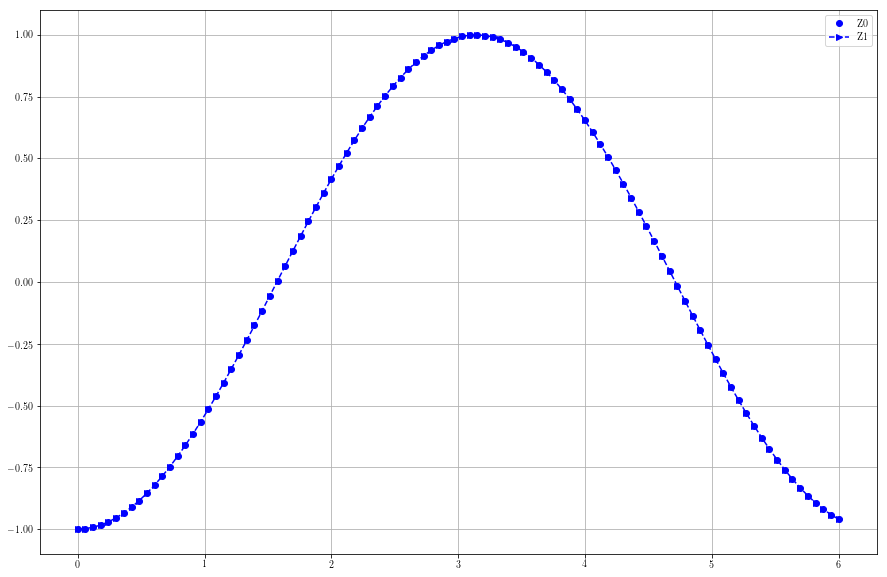

In [10]:
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(thetas,E_z0,'bo',label='Z0')
plt.plot(thetas,E_z1,'b-->',label='Z1')
plt.legend()

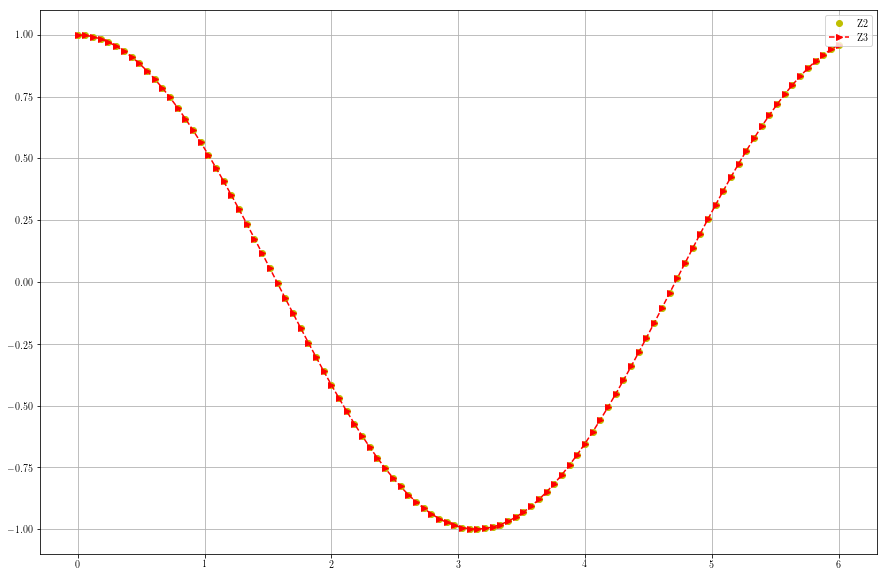

In [13]:
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(thetas,E_z2,'yo',label='Z2')
plt.plot(thetas,E_z3,'r-->',label='Z3')
plt.legend(loc=1)

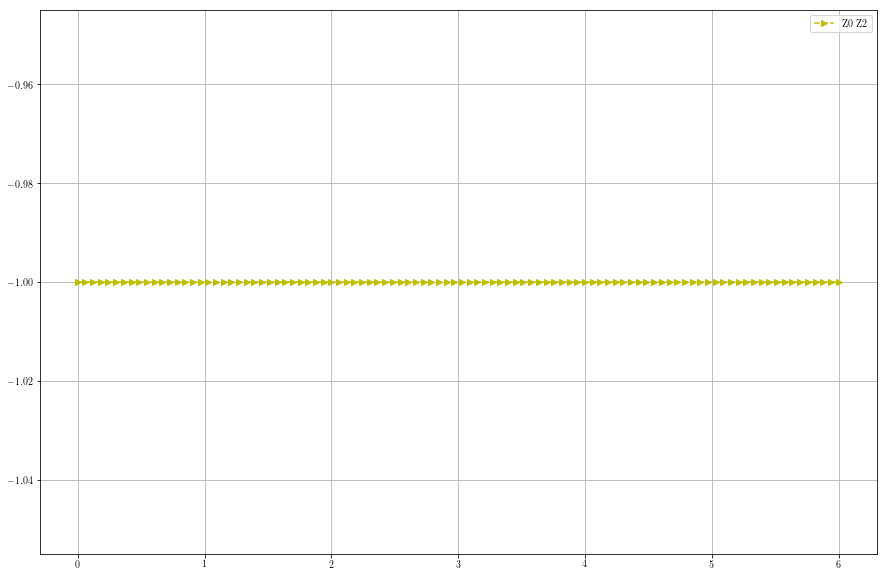

In [28]:
plt.figure(figsize=(15,10))
plt.grid()
#plt.plot(thetas,E_z0z1,'mo',label='Z0 Z1')
plt.plot(thetas,E_z0z2,'y-->',label='Z0 Z2')
plt.legend(loc=1)

[-0.9999999999999991, -0.9999999988357346, -0.9999999953472155, -0.9999999895472518, -0.9999999814571408, -0.9999999711065889, -0.9999999585336039, -0.9999999437843523, -0.9999999269129936, -0.9999999079814785, -0.9999998870593235, -0.9999998642233536, -0.9999998395574224, -0.9999998131521017, -0.999999785104352, -0.9999997555171631, -0.9999997244991783, -0.9999996921642949, -0.9999996586312456, -0.9999996240231628, -0.9999995884671264, -0.999999552093697, -0.9999995150364369, -0.9999994774314189, -0.999999439416728, -0.9999994011319528, -0.9999993627176742, -0.9999993243149474, -0.9999992860647869, -0.999999248107646, -0.9999992105829021, -0.9999991736283449, -0.9999991373796704, -0.9999991019699827, -0.9999990675293053, -0.9999990341841031, -0.999999002056819, -0.999998971265423, -0.9999989419229806, -0.9999989141372365, -0.9999988880102186, -0.9999988636378649, -0.9999988411096697, -0.9999988205083563, -0.9999988019095716, -0.99999878538161, -0.9999987709851618, -0.9999987587730902,

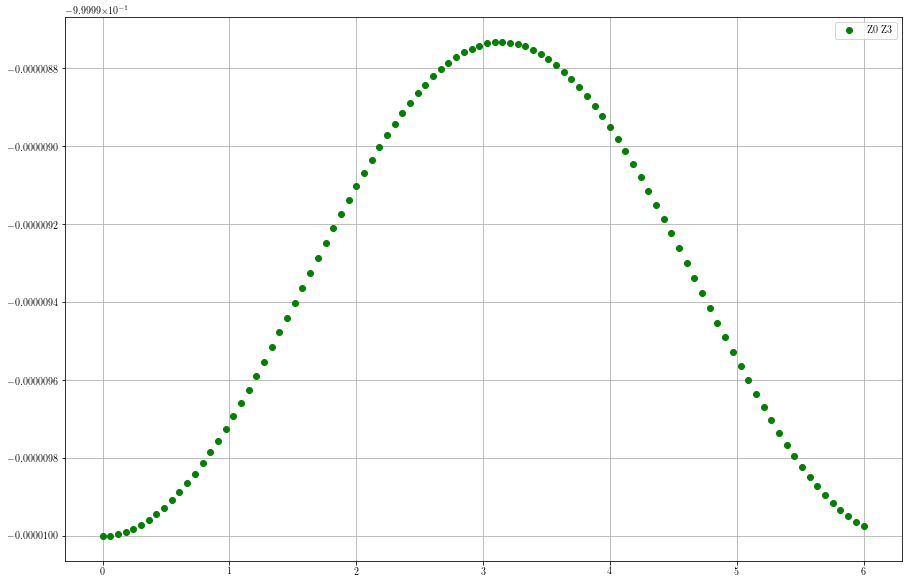

In [32]:
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(thetas,E_z0z3,'go',label='Z0 Z3')
#plt.plot(thetas,E_z1z2,'r--s',label='Z1 Z2')
plt.legend(loc=1)
print(E_z0z3)

[0.9999999999999991, 0.9999999988357346, 0.9999999953472155, 0.9999999895472518, 0.9999999814571408, 0.9999999711065889, 0.9999999585336039, 0.9999999437843523, 0.9999999269129936, 0.9999999079814785, 0.9999998870593235, 0.9999998642233536, 0.9999998395574224, 0.9999998131521017, 0.999999785104352, 0.9999997555171631, 0.9999997244991783, 0.9999996921642949, 0.9999996586312456, 0.9999996240231628, 0.9999995884671264, 0.999999552093697, 0.9999995150364369, 0.9999994774314189, 0.999999439416728, 0.9999994011319528, 0.9999993627176742, 0.9999993243149474, 0.9999992860647869, 0.999999248107646, 0.9999992105829021, 0.9999991736283449, 0.9999991373796704, 0.9999991019699827, 0.9999990675293053, 0.9999990341841031, 0.999999002056819, 0.999998971265423, 0.9999989419229806, 0.9999989141372365, 0.9999988880102186, 0.9999988636378649, 0.9999988411096697, 0.9999988205083563, 0.9999988019095716, 0.99999878538161, 0.9999987709851618, 0.9999987587730902, 0.9999987487902378, 0.999998741073261, 0.999998

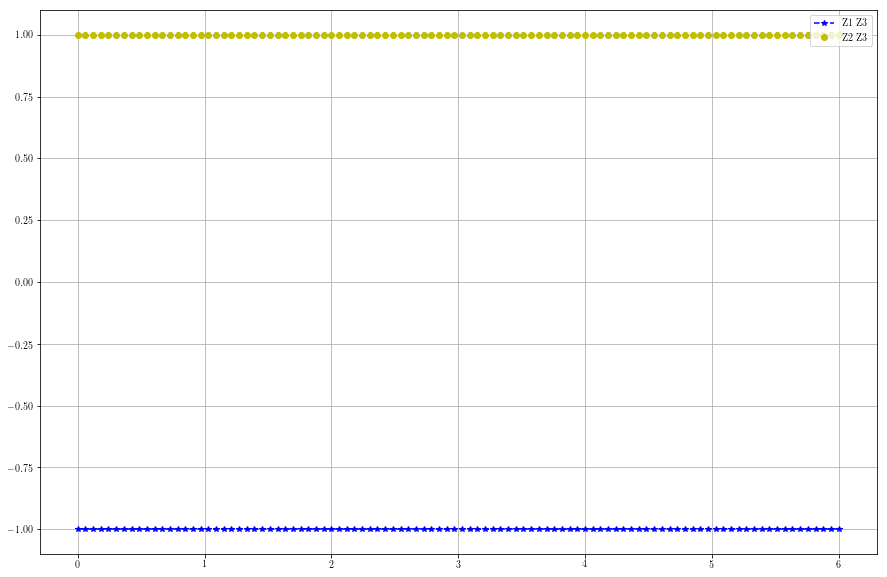

In [38]:
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(thetas,E_z1z3,'b--*',label='Z1 Z3')
plt.plot(thetas,E_z2z3,'yo',label='Z2 Z3')
plt.legend(loc=1)

print(E_z2z3)

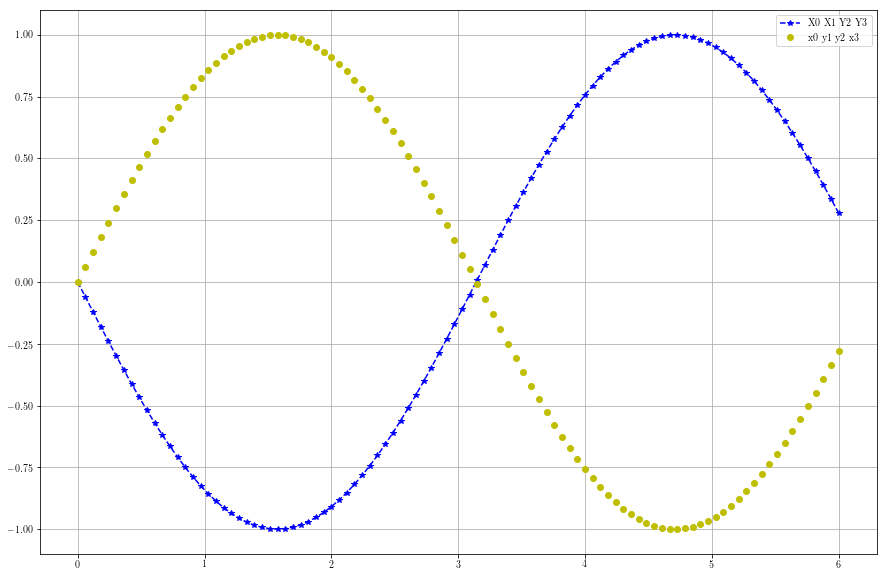

In [24]:
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(thetas,E_x0x1y2y3,'b--*',label='X0 X1 Y2 Y3')
plt.plot(thetas,E_x0y1y2x3,'yo',label='X0 Y1 Y2 X3')
plt.legend(loc=1)

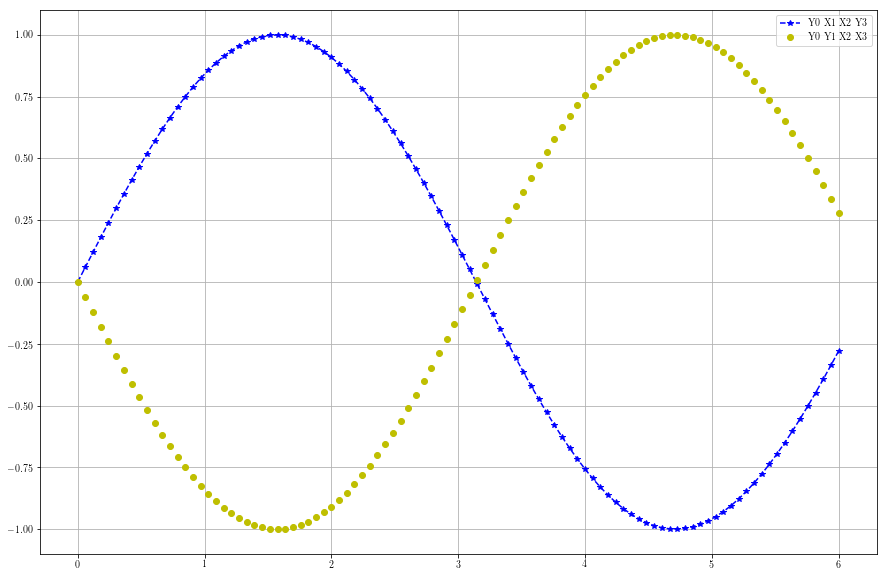

In [25]:
plt.figure(figsize=(15,10))
plt.grid()
plt.plot(thetas,E_y0x1x2y3,'b--*',label='Y0 X1 X2 Y3')
plt.plot(thetas,E_y0y1x2x3,'yo',label='Y0 Y1 X2 X3')
plt.legend(loc=1)